In [22]:
import pandas as pd

import os

import numpy as np

import networkx as nx

import matplotlib.pyplot as plt

from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
#importo il grafo completo
first_graph = nx.read_gpickle('data/first_graph.gpickle')

# Prime misure generali
## Numero di nodi e link

In [5]:
n_nodes = first_graph.number_of_nodes()
n_links = first_graph.number_of_edges()
print("Number of nodes:\t{}".format(n_nodes))
print("Number of links:\t{}".format(n_links))

Number of nodes:	10577
Number of links:	2865239


## Grado medio e densità

In [16]:
degrees_dict = dict(first_graph.degree()).values()
degrees_list = list(degrees_dict)
avg_degree = np.mean(degrees_list)
density = nx.density(first_graph)
print('Average degree:\t{}'.format(avg_degree))
print('Density:\t{}'.format(density))

Average degree:	541.7867070057672
Density:	0.051227941282693576


# Analisi della distribuzione del grado

In [20]:
print("Average degree:\t\t{}".format(avg_degree))
print('Standard deviation:\t{}'.format(np.std(degrees_list)))
print('Median:\t\t\t{}'.format(np.median(degrees_list)))
print('Minimum:\t\t{}'.format(np.min(degrees_list)))
print('Maximum:\t\t{}'.format(np.max(degrees_list)))

Average degree:		541.7867070057672
Standard deviation:	784.2755949483075
Median:			142.0
Minimum:		1
Maximum:		3738


## ECDF - loglog scale

Text(0.5, 0, 'Degree')

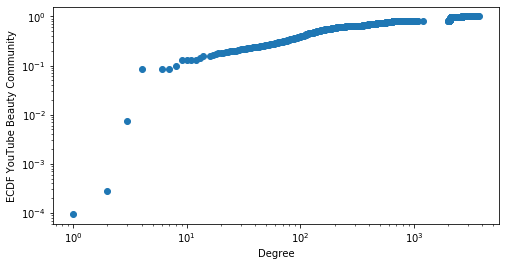

In [23]:
ecdf = ECDF(degrees_list)
x = np.unique(degrees_list)
y = ecdf(x)
fig_ecdf = plt.figure(figsize=(8,4))
axes = fig_ecdf.gca()
axes.loglog(x,y,marker = 'o', ms = 6, linestyle='None')
axes.set_ylabel('ECDF YouTube Beauty Community')
axes.set_xlabel('Degree')

## Confronto con rete equivalente E-R

In [24]:
p = density

In [25]:
er_n_links = []
er_degrees= []
er_densities = []
random_graph = nx.fast_gnp_random_graph(n_nodes,p)